<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [6]:
print("Rows x Cols in the Boston dataset", boston_df.shape)

Rows x Cols in the Boston dataset (506, 14)


In [7]:
print("Let's understand the type of fields")
print(boston_df.dtypes)

Let's understand the type of fields
Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object


In [8]:
print("Let's see if any of the fields have NAs")
print("This will be TRUE if any of the fields have nulls or NAs:", boston_df.isnull().values.any())

Let's see if any of the fields have NAs
This will be TRUE if any of the fields have nulls or NAs: False


In [9]:
print("Any duplicates?", boston_df.duplicated().values.any())

Any duplicates? False


## Task 2: Generate Descriptive Statistics and Visualizations


In [10]:
print("Let's look at basic descriptive statistics of the data") 
boston_df.describe()

Let's look at basic descriptive statistics of the data


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


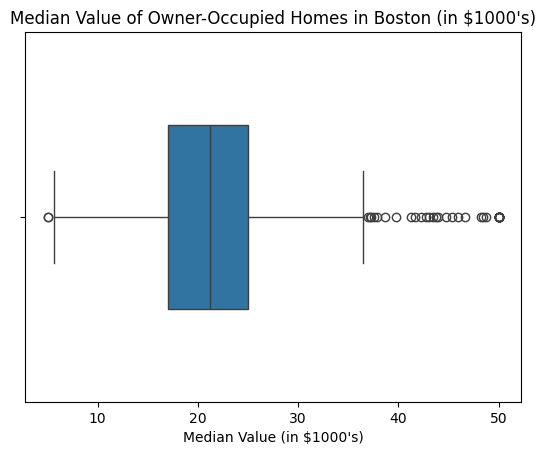

In [11]:
# Create boxplot with specified color
medv_of_owner_occupied_homes_boxplot = sns.boxplot(data=boston_df, x="MEDV", width=0.5)

# Set title and labels
medv_of_owner_occupied_homes_boxplot.set(title="Median Value of Owner-Occupied Homes in Boston (in $1000's)", xlabel="Median Value (in $1000's)")

# Remove background
medv_of_owner_occupied_homes_boxplot.set_facecolor("None")

Median is around 20K. There's a decent amount of outliers in the higher side of median home values.

## Task 2: Generate Descriptive Statistics and Visualizations


[Text(0.5, 1.0, 'Count of Homes tracted by Charles river vs not.'),
 Text(0.5, 0, 'Tracted by Charles River'),
 Text(0, 0.5, 'Count of homes')]

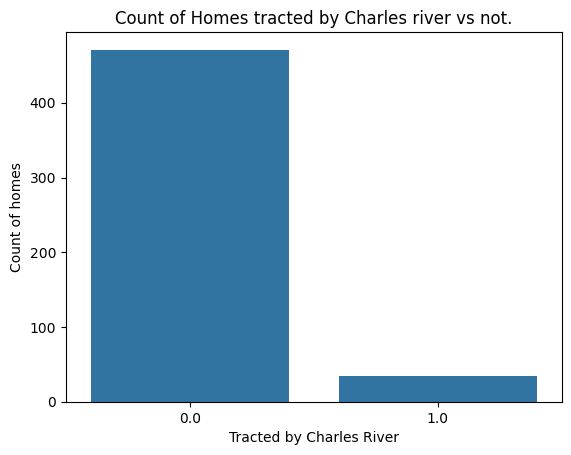

In [19]:
# Provide a  bar plot for the Charles river variable
charles_river_bar_plot = sns.countplot(data=boston_df, x='CHAS')

# Set title and labels
charles_river_bar_plot.set(title='Count of Homes tracted by Charles river vs not.', xlabel='Tracted by Charles River', ylabel='Count of homes')

Majority of homes are not tracted by Charles river. Around 50ish homes are tracted by charles river.

[Text(0.5, 1.0, "Median Value of Owner-Occupied Homes in Boston (in $1000's) across age buckets"),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, "Median value in 1000's")]

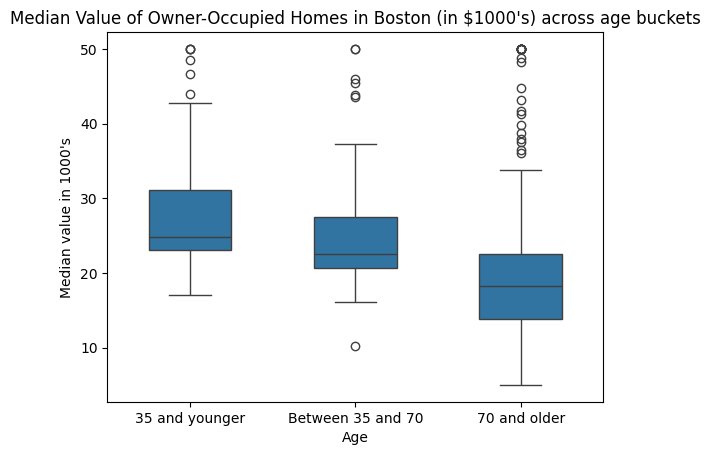

In [45]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older).

def assign_age_bucket(df):
    if (df['AGE'] <= 35):
        return '35 and younger'
    elif (df['AGE'] > 35 and df['AGE'] < 70):
        return 'Between 35 and 70'
    else:
        return '70 and older'

boston_df['AGE_BUCKET'] = boston_df.apply(assign_age_bucket, axis=1)

# Boxplot using MEDV and age varaible.5
medv_and_age_bucket_boxplot = sns.boxplot(data=boston_df, y='MEDV', x='AGE_BUCKET', order=['35 and younger', 'Between 35 and 70', '70 and older'], width=0.5)

# Assign title and axis labels.
medv_and_age_bucket_boxplot.set(title="Median Value of Owner-Occupied Homes in Boston (in $1000's) across age buckets", xlabel='Age', ylabel="Median value in 1000's")


Median home values decrease as the age of homes increase. 70+ age homes have the highest amount of outliers.

[Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town'),
 Text(0, 0.5, 'Nitric oxides concentration (parts per 10 million)')]

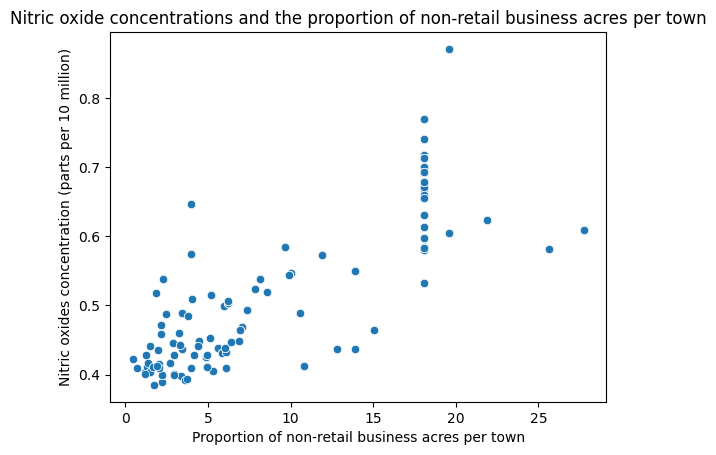

In [50]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
nitric_oxide_vs_non_retail_business_scatter_plot = sns.scatterplot(data=boston_df, x='INDUS', y='NOX')

nitric_oxide_vs_non_retail_business_scatter_plot.set(title='Nitric oxide concentrations and the proportion of non-retail business acres per town', xlabel = 'Proportion of non-retail business acres per town', ylabel='Nitric oxides concentration (parts per 10 million)')

#Relationship is linearly positive.

There seems to be a positive correlation (linear) between nitric oxide concentrations and the proportion of non-retail business acres per town. As proportion increases, do does the nitric oxide concentration.

[Text(0.5, 1.0, 'Distribution of Pupil to Teacher ratio'),
 Text(0.5, 0, 'Pupil to Teacher ratio')]

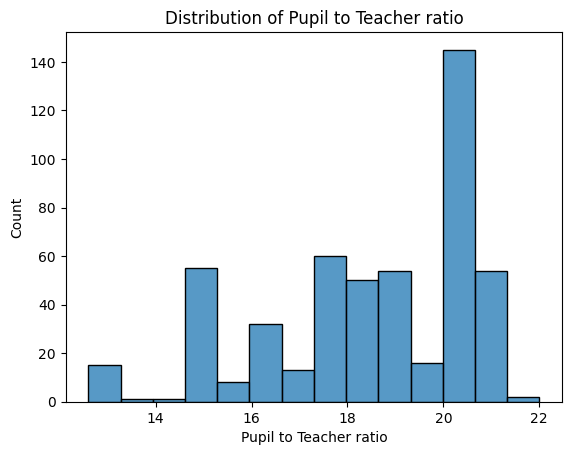

In [57]:
# Create a histogram for the pupil to teacher ratio variable.
pupil_to_teacher_histogram = sns.histplot(data=boston_df, x='PTRATIO')

pupil_to_teacher_histogram.set(title='Distribution of Pupil to Teacher ratio', xlabel='Pupil to Teacher ratio')

- Most Common Ratio: The most common pupil-to-teacher ratio is around 20, as indicated by the tallest bar in the histogram. This means a large number of schools or regions have this ratio.
- Range: Pupil-to-teacher ratios range from approximately 13 to 22.
- Distribution: The distribution is not symmetrical. There are fewer schools with lower ratios (below 18) compared to higher ratios (above 18).


## Task 3: Use the appropriate tests to answer the questions provided.


**Q1**: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Use α = 0.05


Solution: 

- Null hypothesis => H0: No significant difference in median value of houses bounded by charles river vs not => Hc -  = 0
- Alternate hypothesis => Ha: Significant difference in median value of houses bounded by charles river vs not => Hc - Hnc <> 0 


In [60]:
# Check for equality of variance.

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

# since the p-value is less than 0.05, we cannot assume equality of variance.

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [62]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion**: Since P is less than 0.05, we reject null hypothesis as there's enough proof that there is a significant difference in median value of houses bounded by charles river vs not.

**Q2**: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Null hypothesis => H0: No significant difference in median value of houses built prior to 1940 vs later
- Alternate hypothesis => Ha: Significant difference in median value of houses built prior to 1940 vs later

In [67]:
# Test for equality of variance.
scipy.stats.levene(boston_df[boston_df['AGE_BUCKET'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['AGE_BUCKET'] == 'Between 35 and 70']['MEDV'], 
                   boston_df[boston_df['AGE_BUCKET'] == '70 and older']['MEDV'], 
                   center='mean')

# since the p-value is greater than 0.05, we can assume equality of variance.

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [68]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['AGE_BUCKET'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['AGE_BUCKET'] == 'Between 35 and 70']['MEDV'], 
                   boston_df[boston_df['AGE_BUCKET'] == '70 and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Since p-value is less than 0.05, we have enough evidence to reject null hypothesis as at least one of the means differ. There's a significant difference in median value of houses built prior to 1940 vs later.

**Q3**: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- Null hypothesis => H0: No relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
- Alternate hypothesis => Ha: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

[Text(0.5, 1.0, 'Nitric oxides concentration (parts per 10 million) vs Proportion of non-retail business acres per town'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town'),
 Text(0, 0.5, 'Nitrix oxides contentration (parts per 10M)')]

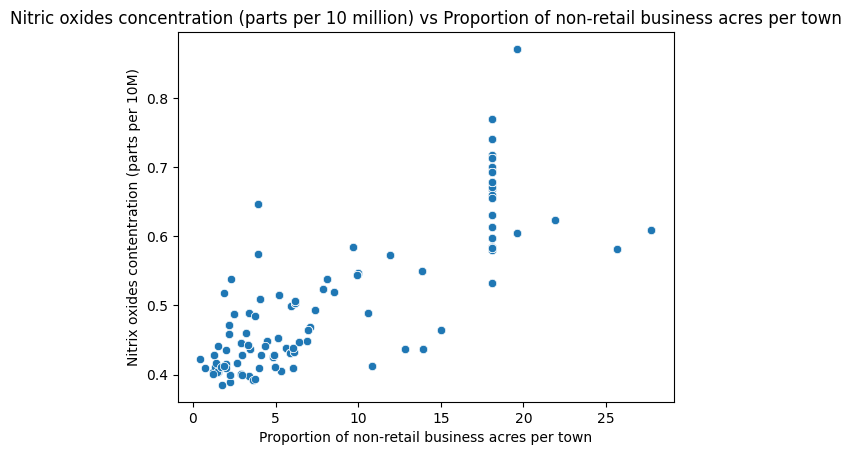

In [75]:
# Let's plot Nitric oxide concentrations vs proportion of non-retail business acres per town.
indus_vs_nox_scatterplot = sns.scatterplot(data=boston_df, x='INDUS', y='NOX')

indus_vs_nox_scatterplot.set(title='Nitric oxides concentration (parts per 10 million) vs Proportion of non-retail business acres per town', xlabel='Proportion of non-retail business acres per town', ylabel='Nitrix oxides contentration (parts per 10M)')

In [76]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion**: Since p-value is less than 0.05, we reject the null hypothesis as there's enough evidence that there is a relationship between nitric oxide concentrations and proportion of non-retail business acres per town.

**Q4**: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

- H0: Distance does not impact median value of owner occupied homes.
- Ha: Distance does impact median value of owner occupied homes.

In [78]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.21e-08
Time:                        11:09:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: Since p-value is less than 0.05, we reject the null hypothesis as there's enough evidence that distance to five Boston employment centres is correlated to median value of owner occupied homes.

There's a positive correlation. It increases by a factor of 1.0916.